# Homework 2

In this homework, we are gonna perform some EDA work on our browser history!

Extract & prepare your history dataset using: `https://github.com/msaricaumbc/DS601/blob/main/Week09/homework/preparation_BrowserHistory.ipynb`

DO NOT commit your history dataset!

Watch this: https://www.youtube.com/watch?v=iFTWM7HV2UI

In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#reading csv file 
df = pd.read_csv('history_cleaned main.csv')
df.shape

(2328, 2)

In [3]:
#using head function to check top 5 entries 
df.head()

,Time,domain
0,9/18/2024 18:38,chatgpt.com
1,9/18/2024 18:26,chatgpt.com
2,9/18/2024 18:26,www.google.com
3,9/18/2024 18:26,google.com
4,9/18/2024 18:26,google.com


In [4]:
#using tail function to check last 5 entries
df.tail()

,Time,domain
2323,1600-12-31 19:00:00,www1.go123movies.io
2324,1600-12-31 19:00:00,www1.subsmovies.nz
2325,1600-12-31 19:00:00,www3.the123movies.com
2326,1600-12-31 19:00:00,www3.the123movies.com
2327,8/21/2024 4:31,myactivity.google.com


In [5]:
#checking null values sum using isna and sum function
df.isna().sum()

Time      0
domain    0
dtype: int64

In [6]:
#double checking and dropping null values

df.dropna( inplace=True)

In [7]:
#using dtypes for data types
df.dtypes

Time      object
domain    object
dtype: object

In [8]:
# time column is string and string date is starting with YYYY, so I can do string compares
sum(df['Time'] < '1900') 

216

In [9]:
# filtering time frame greater than 1900
df = df[df.Time > '1900'].copy() 

In [10]:
#using pd.to_datetime() function to convert time to time string
df['Time'] = pd.to_datetime(df['Time'])
df.sample(10)

,Time,domain
1592,2024-08-28 01:28:00,www.linkedin.com
1069,2024-09-03 18:56:00,www.google.co.in
126,2024-09-17 16:44:00,webauth.umbc.edu
1743,2024-08-26 15:22:00,api-4f567d87.duosecurity.com
1752,2024-08-26 14:10:00,www.linkedin.com
1446,2024-08-28 20:51:00,www.google.co.in
345,2024-09-13 10:27:00,sso.compassmanager.com
1843,2024-08-25 21:46:00,www.geeksforgeeks.org
1571,2024-08-28 01:32:00,www.linkedin.com
1089,2024-09-02 23:26:00,www.youtube.com


In [11]:
#converting the domain column to string.
df['domain'] = df['domain'].astype(str)
df.sample(1)

,Time,domain
2106,2024-08-21 06:34:00,myactivity.google.com


In [12]:
#using dtypes function to check the data type
df.dtypes

Time      datetime64[ns]
domain            object
dtype: object

In [13]:
#using head function to check the changed top 5 rows
df.head()

,Time,domain
0,2024-09-18 18:38:00,chatgpt.com
1,2024-09-18 18:26:00,chatgpt.com
2,2024-09-18 18:26:00,www.google.com
3,2024-09-18 18:26:00,google.com
4,2024-09-18 18:26:00,google.com


In [14]:
#check the top 50 websites and couting their entries  
df['domain'].value_counts()[:50]

www.linkedin.com                379
www.youtube.com                 322
www.google.co.in                133
www.instagram.com               115
chatgpt.com                      98
accounts.google.com              81
webauth.umbc.edu                 76
api-4f567d87.duosecurity.com     70
www.google.com                   50
auth0.openai.com                 31
careers-ecslimited.icims.com     26
csprd-web.ps.umbc.edu            26
recruiting2.ultipro.com          23
www.amazon.com                   22
my.umbc.edu                      19
mail.google.com                  18
www.overleaf.com                 18
myactivity.google.com            17
my3.my.umbc.edu                  17
smartapply.indeed.com            16
neetcode.io                      15
blackboard.umbc.edu              15
www.geeksforgeeks.org            15
apply-arco.icims.com             14
docs.google.com                  12
www.chess.com                    12
us06web.zoom.us                  11
emit.fa.ca3.oraclecloud.com 

<Axes: >

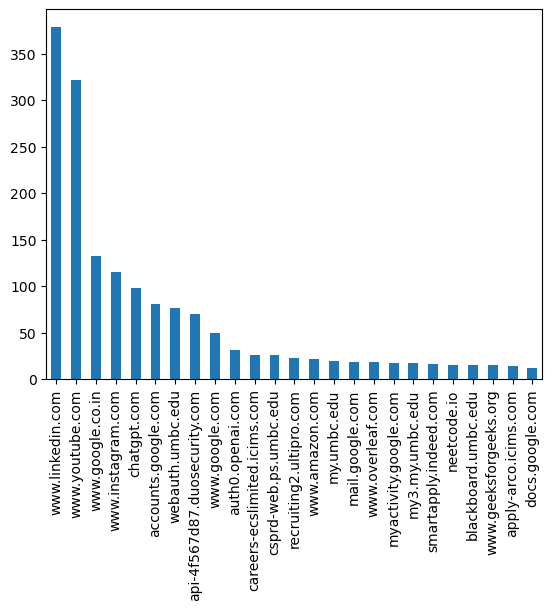

In [15]:
# Filtering the top 25 domain with respect to count and plotting a bar graph
df['domain'].value_counts()[:25].plot(kind='bar')

Interpretation of the graph/trend - The left side of the graph shows the most visited websites and as we move right we can see the least visited websites.
Top 5 visited websites in top 25 filter are: 
1. www.linkedin.com                379
2. www.youtube.com                 322
3. www.google.co.in                133
4. www.instagram.com               115
5. chatgpt.com                      98

least 5 visited in the recent 25 are :
1. neetcode.io                      15
2. blackboard.umbc.edu              15
3. www.geeksforgeeks.org            15
4. apply-arco.icims.com             14
5. docs.google.com                  12


In [16]:
#Filtering usage at different hours by grouping hours and the counts
hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
hourly_counts

Time
0     120
1     153
2      38
3      11
4       1
5       8
6      27
7       4
8      18
9      62
10    133
11     44
12     91
13     71
14     79
15    111
16    187
17    188
18    153
19    152
20    102
21     56
22    129
23    174
Name: domain, dtype: int64

<Axes: xlabel='Time'>

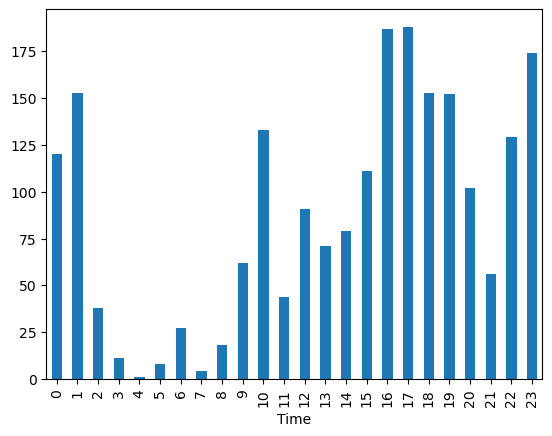

In [17]:
#plotting the grouped hour wise usage count. X axis has hours in 24 hour format ranging from 0-23 hrs 
#and y axis has how many times it was accessed.  
hourly_counts.plot.bar()

Insights from the graph
1. High Activity- Increased activity can be noticed during later part of the day from 16 and a small drop can be seen near 21 
which can be assummed as a break and then again the usage starts increasing from 22:00 PM to 1 AM
2. Least Activity - The least activity period is fro 2:00 AM to 9 AM. It can be assummed that user could be sleeping during this hour 
It can be observed that 4:00 PM to to 2 AM is the peak work time.


In [18]:
# Itterating over each entry to add name and day index of the day to find a usage pattern in week
df['Day'] = [ d.day_name() for d in df['Time']]
df['DayIndex'] = [ d.dayofweek for d in df['Time']]
df.head()

,Time,domain,Day,DayIndex
0,2024-09-18 18:38:00,chatgpt.com,Wednesday,2
1,2024-09-18 18:26:00,chatgpt.com,Wednesday,2
2,2024-09-18 18:26:00,www.google.com,Wednesday,2
3,2024-09-18 18:26:00,google.com,Wednesday,2
4,2024-09-18 18:26:00,google.com,Wednesday,2


In [19]:
#getting the value counts for websites accessed on each day of the week using counts function
df['Day'].value_counts()

Saturday     487
Wednesday    471
Monday       260
Friday       244
Sunday       240
Thursday     220
Tuesday      190
Name: Day, dtype: int64

In [20]:
#Sorting the data in daywise manner in order to display with notations of different days using value_counts and sort_index functions are used  
days_sorted = df['DayIndex'].value_counts().sort_index()
days_sorted

0    260
1    190
2    471
3    220
4    244
5    487
6    240
Name: DayIndex, dtype: int64

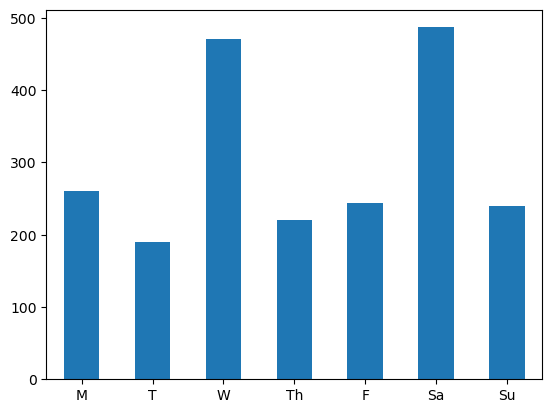

In [21]:
#plotting the graph while renaming 0,1,2,3,4,5,6 as 'M', 'T', 'W','Th', 'F', 'Sa', 'Su'
days_sorted.plot.bar()
plt.xticks(days_sorted.index, ['M', 'T', 'W','Th', 'F', 'Sa', 'Su'], rotation=0)

plt.show()

1. Highest Activity is seen on Wednesday and Saturday. It can be assummed that Most of the submission deadlines or work reviews could be on Thursday and Sunday
2. Lowest activity is on Tuesday. It can sugges that it is relatively an inactive day and tasks for the week are not yet given. Adding to the same thought Wednesday has the highest usage reflecting that most of the work starts on tuesday
3. Weekends also have significant activity- Since there is  less entertainment related data it can be inferred that the user works on saturday and relaxes on sundays comparitvely.

In [22]:
#Looping through the data and for every value of i it checks with the help of function 
#if its a sat or sun and returns True if weekend
def is_weekend(day): 
    return day in ['Saturday', 'Sunday']


df['isWeekend'] = [ is_weekend(i) for i in df['Day']]
df.sample()

,Time,domain,Day,DayIndex,isWeekend
1474,2024-08-28 20:28:00,www.overleaf.com,Wednesday,2,False


In [23]:
#if the value is true then its weekend and if not then weekday
weekend = df[ df['isWeekend'] == True ]

weekday = df[ df['isWeekend'] == False ]


In [24]:
#using head function to check the orientation
weekend.head()

,Time,domain,Day,DayIndex,isWeekend
189,2024-09-15 22:44:00,app.grammarly.com,Sunday,6,True
190,2024-09-15 22:44:00,www.grammarly.com,Sunday,6,True
191,2024-09-15 22:44:00,app.grammarly.com,Sunday,6,True
192,2024-09-15 22:44:00,www.google.co.in,Sunday,6,True
193,2024-09-15 22:31:00,www.google.co.in,Sunday,6,True


In [25]:
#counting the weekday values for each domain using values_count function
weekday['domain'].value_counts()[:5]

www.linkedin.com    235
www.youtube.com     189
www.google.co.in     99
webauth.umbc.edu     73
chatgpt.com          67
Name: domain, dtype: int64

In [26]:
#counting the weekend values for each domain using values_count function
weekend['domain'].value_counts()[:15]

www.linkedin.com                144
www.youtube.com                 133
www.instagram.com               115
www.google.co.in                 34
chatgpt.com                      31
careers-ecslimited.icims.com     26
www.amazon.com                   21
accounts.google.com              15
mail.google.com                  11
www.google.com                    9
neetcode.io                       8
jobs.jobvite.com                  7
pythontutor.com                   7
www.geeksforgeeks.org             6
acrobat.adobe.com                 6
Name: domain, dtype: int64

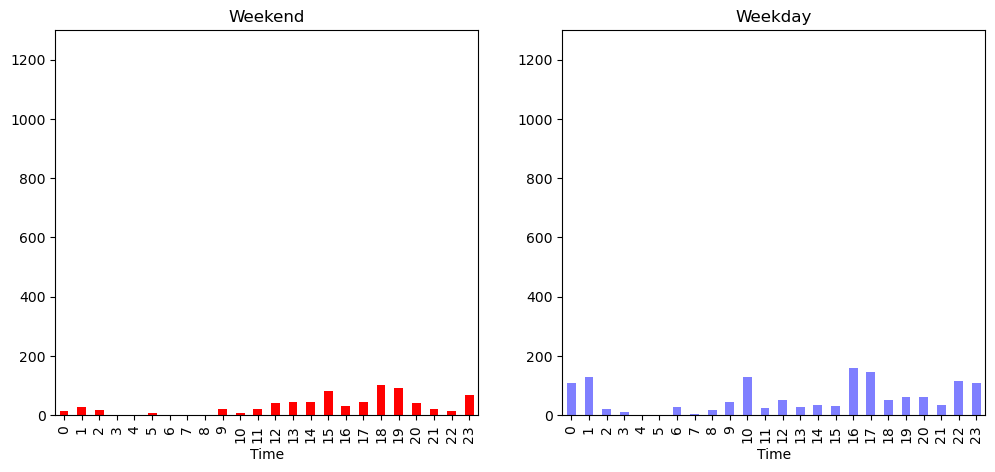

In [27]:
#the function is designed to plot data of weekdays and weekends in a 2 side by side plot
def show_stats(df, color, alpha=1, title='', fig=None):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
            
    if fig != None:
        plt.subplot(1,2, fig)
        
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha)
    plt.title(title)
    plt.ylim([0, 1300])
    

plt.figure(figsize=(12, 5))
show_stats( weekend, 'red', 1, 'Weekend', 1)
    
show_stats( weekday, 'blue', 0.5, 'Weekday', 2)

plt.show()


Be skeptical!

Am I on computer a lot more on the weekdays or it shows more simply because there are more weekdays 

1. During Weekends the activity shows spike in from 12 PM with periodic breaks at 4PM and 9-10 PM the web activity can be noticed 
2. For the Week day part random peaks can be seen at 10 AM, 4 PM,5 PM.

It shows I am more active weekdays but this is not normalized 

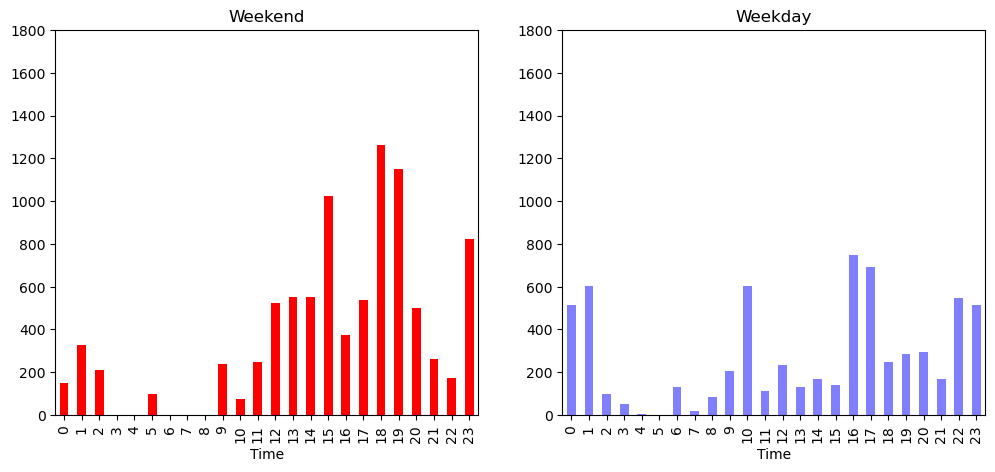

In [28]:
# Normalizing the data within the function by dividing the hourly activity by the number of unique days in the dataset. and plotting the graph
def show_stats(df, color, alpha=1, title='', fig=None, y_lim = None):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    days_counts = df.Time.dt.date.nunique()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
        else: 
            hourly_counts[h] = hourly_counts[h] * 100.0 /  days_counts # I multiplied by 100.0 to make it float and also not to loose decimals
           
    if fig != None:
        plt.subplot(1,2, fig)
        
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha, title=title)
    
    if y_lim != None:
        plt.ylim(y_lim)


plt.figure(figsize=(12, 5))

y_lim=[0, 1800]
show_stats(weekend, 'red', 1, 'Weekend',fig=1, y_lim=y_lim)
    
show_stats(weekday, 'blue', 0.5, 'Weekday',fig=2, y_lim=y_lim)

plt.show()

After Normalizing there is a clear view 
1. it shows that I am way more active on weekends during 11 AM to 7PM gradually increasing usage
2. during week days there is no specific pattern. We can see Peaks from 12- 1AM, 10 AM, 4-5 PM
This shows I am way more active on Weekends

In [29]:
#Using value counts function for domains to count numbers
df['domain'].value_counts()[:10]

www.linkedin.com                379
www.youtube.com                 322
www.google.co.in                133
www.instagram.com               115
chatgpt.com                      98
accounts.google.com              81
webauth.umbc.edu                 76
api-4f567d87.duosecurity.com     70
www.google.com                   50
auth0.openai.com                 31
Name: domain, dtype: int64

In [30]:
#get_data_for_domain Returns rows where the 'domain' column contains the string 'val' 
def get_data_for_domain(val):
    return df[df['domain'].str.lower().str.contains(val.lower(), regex=True)]

# get_data_for_domain('youtube')

In [31]:
#creating a function to plot 
def show_domain_stats(domain, color='blue', alpha=1):
    data = get_data_for_domain(domain)
    show_stats(data, color, alpha)
    return data

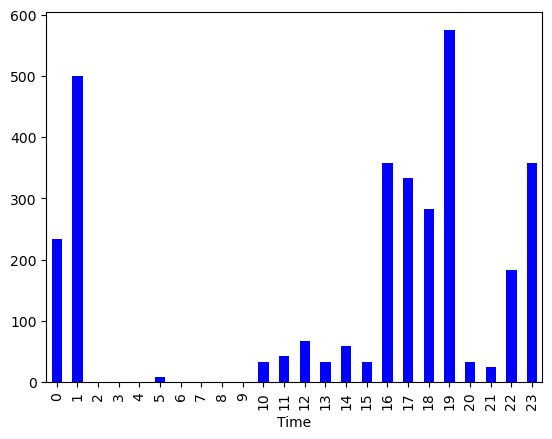

In [32]:
#LinkedIn usage

_= show_domain_stats('linkedin', 'blue')

In [33]:
#LinkedIn is used mostly at evening time to apply or network. Mostly being used from 4-7 PM which could be leisure time that is being used to network

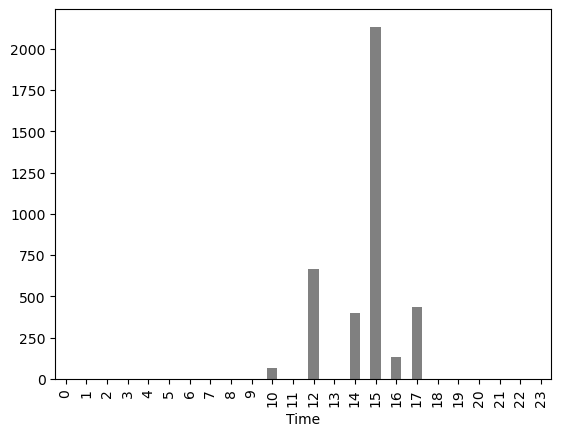

In [34]:
#Instagram usage#LinkedIn usage
_= show_domain_stats('instagram', 'grey')

In [35]:
#Instagram pattern shows very limited usage. User could have an app for this.

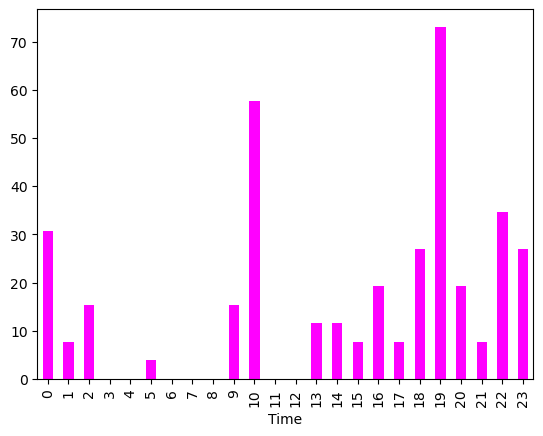

In [36]:
#CHATGPT usage
_ = show_domain_stats('chatgpt', 'magenta')


In [37]:
#Chat gpt usage is significant during evening time this could be used for learning and exploring new stuff.


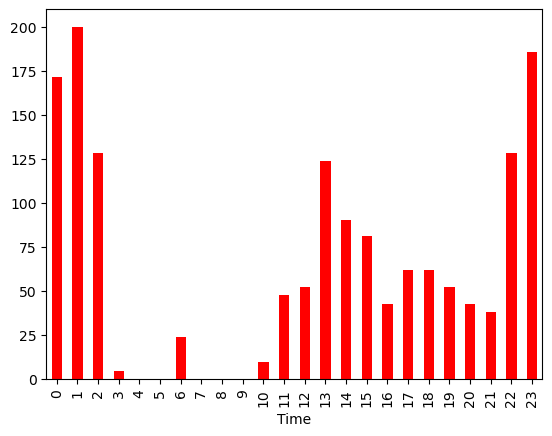

In [38]:
# Youtube Usage
_ = show_domain_stats('youtube', 'red')

In [39]:
#Youtube utilization suggests that youtube is used almost at all times except when the user could be sleeping
#peaks can be observed  in night from 10 PM-2 AM

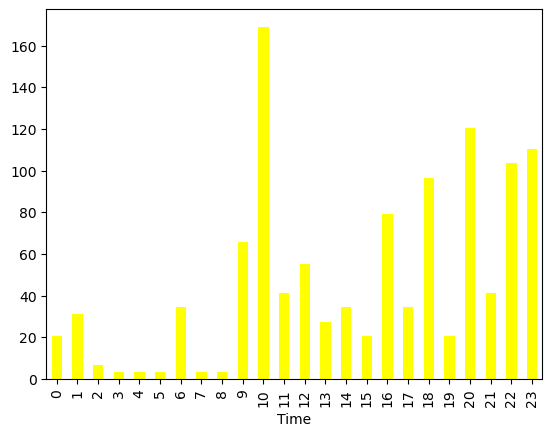

In [40]:
#Google usage
_ = show_domain_stats('google', 'yellow')

In [41]:
#Signigicant Google visits suggests that user is frequently  trying get information about differnet things. 

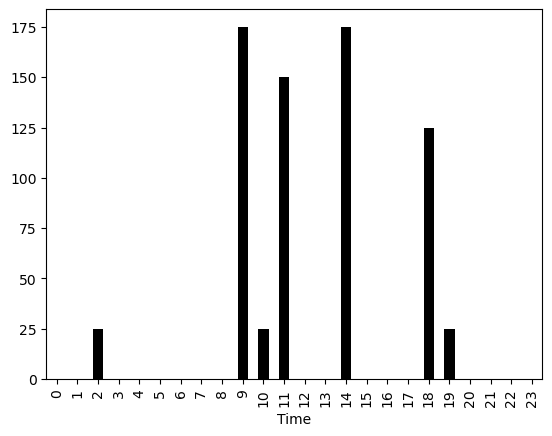

In [42]:
#Amazon Usage
_=show_domain_stats('amazon', 'black')

In [43]:
#Amazon usage shows very limited usage. This suggests that user is not a frequent shopper.

### Based on data, what can we tell about this person?

1. Is this a work computer/personal computer?
1. Is user employed?
1. What is his interests?
1. Anything interesting? 

1. Based on the frequent vists to Instagram, GlassDoor, and UMBC. This shows that this might be a personal Computer as people generally do not access instagram through their work laptop. Additionally visits to UMBC and activity during weekends and late nights suggest that this might be a personal laptop


2. Is user employed?
As most of the activity is on LinkedIn it can be assummed that user can be just networking but visits to various recruiting websites it can be assumed that the user is currently not employed.

3. What is his interests?
It looks like the user only uses youtube a lot for entertainment. Additionally, visits to NeetCode, Geeks for geeks and chat GPT suggest that the user might be interested in coding and learning things right now 


4. 
-> There were multiple visits to accounts.google.com suggest that this is an academic account and the user has multiple accounts for different purposes
-> Multiple visits to umbc authentication website can also be seen to log in to myumbc portal which shows network security 